In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai' , context = 'notebook',ticks =True , grid =False)


In [2]:
mining_df = pd.read_csv('mining_data.csv')

In [3]:
mining_df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [4]:
mining_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245700 entries, 0 to 245699
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   245700 non-null  float64
 1   % Silica Feed                 245700 non-null  float64
 2   Starch Flow                   245700 non-null  float64
 3   Amina Flow                    245700 non-null  float64
 4   Ore Pulp Flow                 245700 non-null  float64
 5   Ore Pulp pH                   245700 non-null  float64
 6   Ore Pulp Density              245700 non-null  float64
 7   Flotation Column 01 Air Flow  245700 non-null  float64
 8   Flotation Column 02 Air Flow  245700 non-null  float64
 9   Flotation Column 03 Air Flow  245700 non-null  float64
 10  Flotation Column 04 Air Flow  245700 non-null  float64
 11  Flotation Column 05 Air Flow  245700 non-null  float64
 12  Flotation Column 06 Air Flow  245700 non-nul

In [5]:
mining_df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,...,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,...,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,...,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527157,1.647197,250.268667,250.367333,250.693667,...,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,...,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,...,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017367EF4CC8>,
      dtype=object)

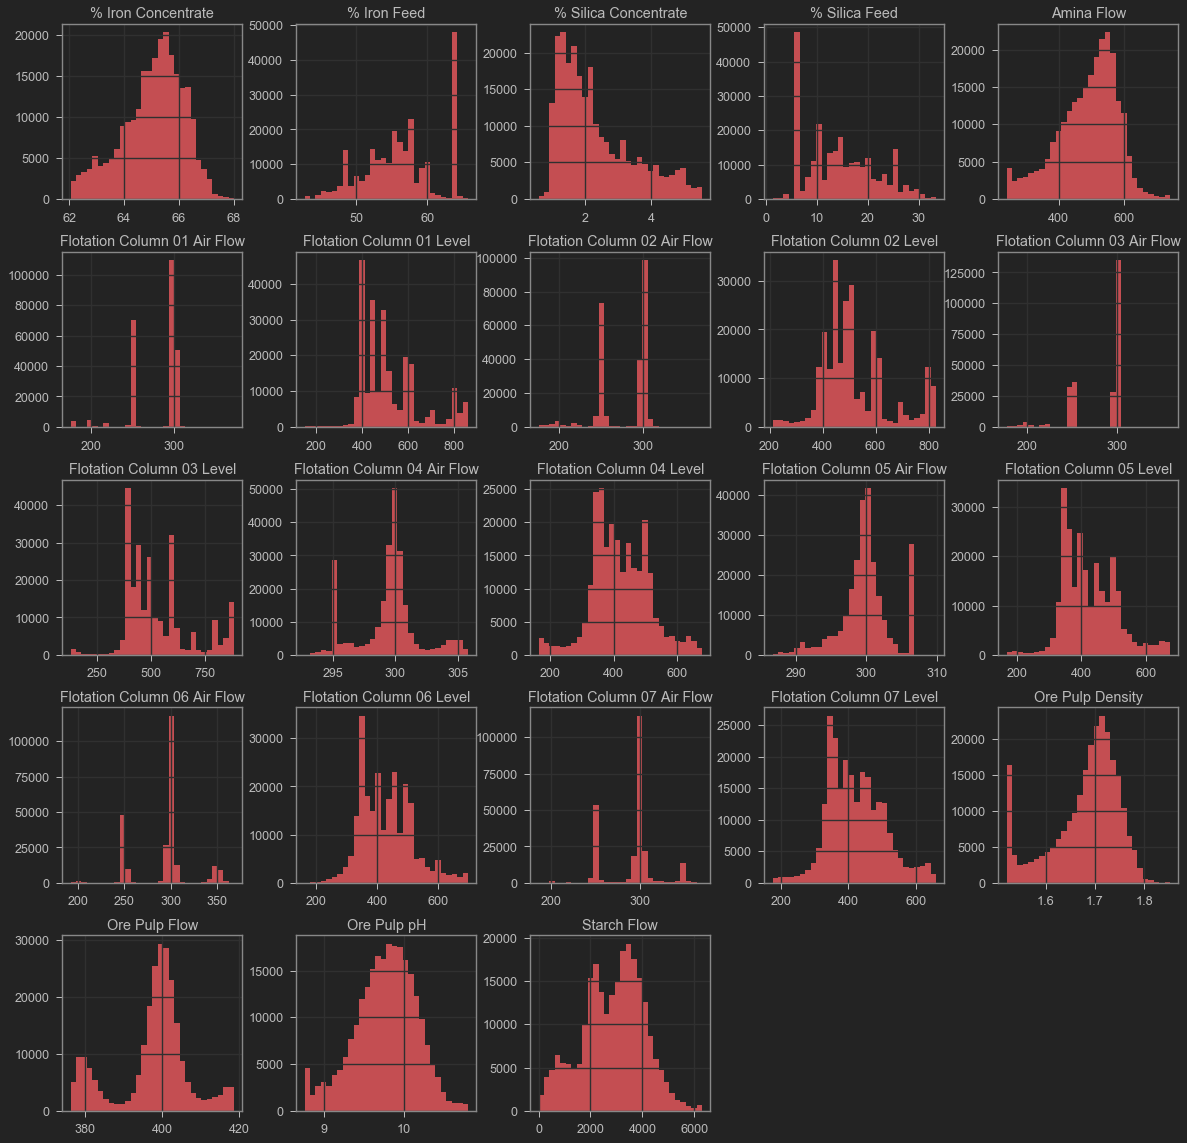

In [6]:
mining_df.hist(bins=30,color='r',figsize=(20,20))

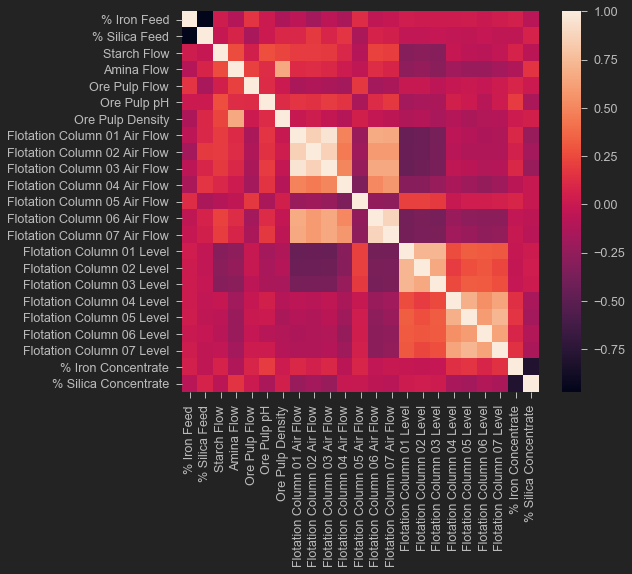

In [7]:
sns.heatmap(mining_df.corr())


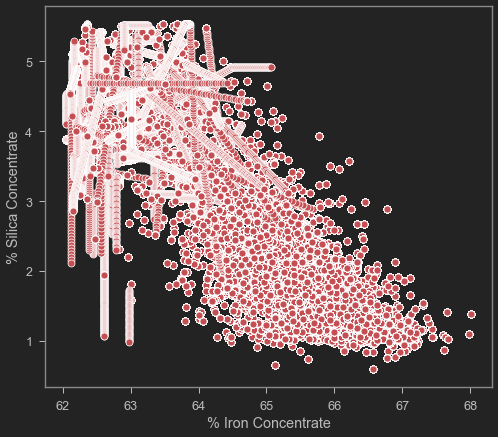

In [8]:
sns.scatterplot(x=mining_df['% Iron Concentrate'],y=mining_df['% Silica Concentrate'],color='r')

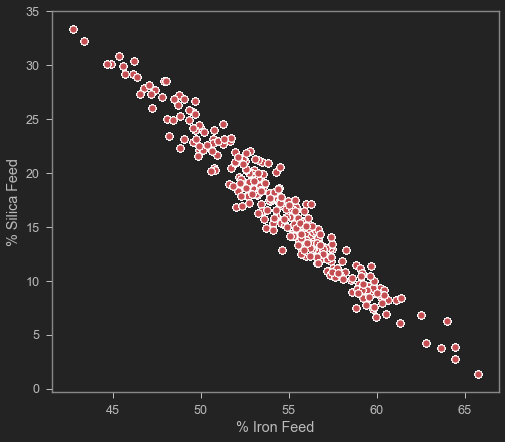

In [9]:
sns.scatterplot(x=mining_df['% Iron Feed'],y=mining_df['% Silica Feed'],color='r')

In [10]:
df_iron = mining_df.drop(columns= '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

In [11]:
df_iron.shape

(245700, 22)

In [12]:
df_iron_target.shape


(245700,)

In [13]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [14]:
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(245700, 1)

In [15]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(df_iron)
y = scaler.fit_transform(df_iron_target)

In [16]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train,y_test  =  train_test_split(X,y,test_size = 0.2)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [18]:
linear = LinearRegression()
linear.fit(x_train , y_train)
accuracy_linear_reg  = linear.score(x_test,y_test) 
accuracy_linear_reg

0.6767471772931293

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train,y_train)
accuracy_dt = dt_clf.score(x_test,y_test)
accuracy_dt

0.982041287960418

In [20]:
# from sklearn.ensemble import RandomForestRegressor
# rnd_clf = RandomForestRegressor(n_estimators=100,max_depth=10)
# rnd_clf.fit(x_train,y_train)
# accuracy_dt = rnd_clf.score(x_test,y_test)
# accuracy_dt

In [21]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Dense , Activation , Dropout
# from tensorflow.keras.optimizers import Adam

In [22]:
# optimizer = Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999 , epsilon = 1e-07,amsgrad=False)

In [23]:
# ann_model = keras.Sequential()
# ann_model.add(Dense(250,input_dim =22 , kernel_initializer='normal', activation='relu'))
# ann_model.add(Dense(500, activation ='relu'))
# ann_model.add(Dropout(0.1))
# ann_model.add(Dense(1000, activation ='relu'))
# ann_model.add(Dropout(0.1))
# ann_model.add(Dense(1000, activation ='relu'))
# ann_model.add(Dropout(0.1))
# ann_model.add(Dense(500, activation ='relu'))
# ann_model.add(Dropout(0.1))
# ann_model.add(Dense(250, activation ='relu'))
# ann_model.add(Dropout(0.1))
# ann_model.add(Dense(1, activation ='linear'))
# ann_model.compile(loss = 'mse',optimizer='adam')
# ann_model.summary()


In [24]:
# history = ann_model.fit(x_train,y_train,epochs = 5, validation_split = 0.2)

In [25]:
# result = ann_model.evaluate(x_test,y_test)
# accuracy_ann = 1-result
# print("Accuracy : {}".format(accuracy_ann))

In [26]:
# history.history.keys()

In [27]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train_loss','val_loss'], loc = 'upper right')
# plt.show()

Text(0, 0.5, 'True Values')

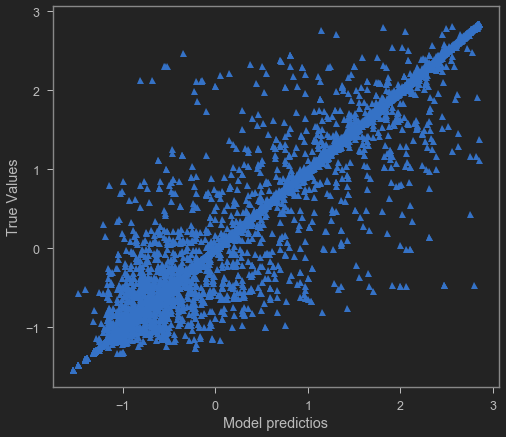

In [28]:
predictions=  dt_clf.predict(x_test)
plt.plot(predictions,y_test,'^', color='b')
plt.xlabel('Model predictios')
plt.ylabel('True Values')